In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [34]:
data = pd.read_csv('ipl_2025_auction_players.csv')

In [43]:
#checking whether there's a null value
data.isnull().sum()

Players    0
Team       0
Type       0
Base       0
Sold       0
dtype: int64

In [45]:
print("Original dataset")
print(data)

Original dataset
                 Players Team  Type  Base    Sold
0            Virat Kohli  RCB   BAT     -   21.00
1          Rajat Patidar  RCB   BAT     -   11.00
2             Yash Dayal  RCB  BOWL     -    5.00
3         Jasprit Bumrah   MI  BOWL     -   18.00
4       Suryakumar Yadav   MI   BAT     -   16.35
..                   ...  ...   ...   ...     ...
618          Vijay Yadav    -    AR  0.30     TBA
619         Jofra Archer   RR  BOWL  2.00   12.50
620  Saurabh Netravalkar    -  BOWL  0.30     TBA
621        Hardik Tamore    -    WK  0.30     TBA
622       Daryl Mitchell    -    AR  2.00  Unsold

[623 rows x 5 columns]


In [48]:
print("After the removal")

data = data[data['Team'] != '-']

data['Sold'] = data['Sold'].replace(['Unsold', 'TBA'], 0.00)
print(data)

After the removal
              Players Team  Type  Base   Sold
0         Virat Kohli  RCB   BAT     -  21.00
1       Rajat Patidar  RCB   BAT     -  11.00
2          Yash Dayal  RCB  BOWL     -   5.00
3      Jasprit Bumrah   MI  BOWL     -  18.00
4    Suryakumar Yadav   MI   BAT     -  16.35
..                ...  ...   ...   ...    ...
573     Eshan Malinga  SRH  BOWL  0.30   1.20
601   Tripurana Vijay   DC    AR  0.30   0.30
609     Madhav Tiwari   DC    AR  0.30   0.40
616    Vignesh Puthur   MI    AR  0.30   0.30
619      Jofra Archer   RR  BOWL  2.00  12.50

[228 rows x 5 columns]


In [63]:
data['Sold'] = pd.to_numeric(data['Sold'])
print(data)

              Players Team  Type  Base   Sold
0         Virat Kohli  RCB   BAT     -  21.00
1       Rajat Patidar  RCB   BAT     -  11.00
2          Yash Dayal  RCB  BOWL     -   5.00
3      Jasprit Bumrah   MI  BOWL     -  18.00
4    Suryakumar Yadav   MI   BAT     -  16.35
..                ...  ...   ...   ...    ...
573     Eshan Malinga  SRH  BOWL  0.30   1.20
601   Tripurana Vijay   DC    AR  0.30   0.30
609     Madhav Tiwari   DC    AR  0.30   0.40
616    Vignesh Puthur   MI    AR  0.30   0.30
619      Jofra Archer   RR  BOWL  2.00  12.50

[228 rows x 5 columns]


Team
CSK     25
GT      25
PBKS    25
LSG     24
MI      23
DC      23
RCB     22
KKR     21
SRH     20
RR      20
Name: count, dtype: int64


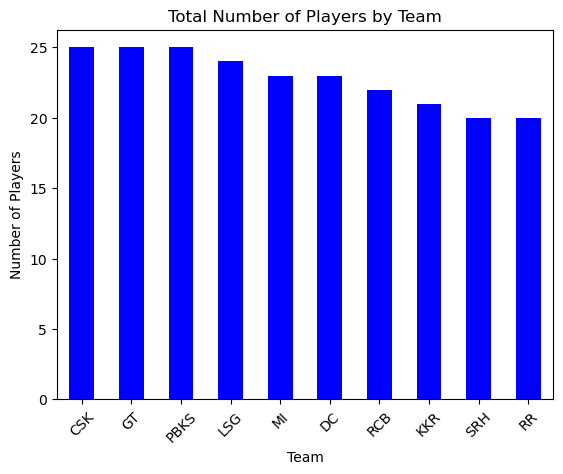

In [60]:
#players by each team
players_by_team = data['Team'].value_counts()
print(players_by_team)
players_by_team.plot(kind='bar', color='blue')
plt.title('Total Number of Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

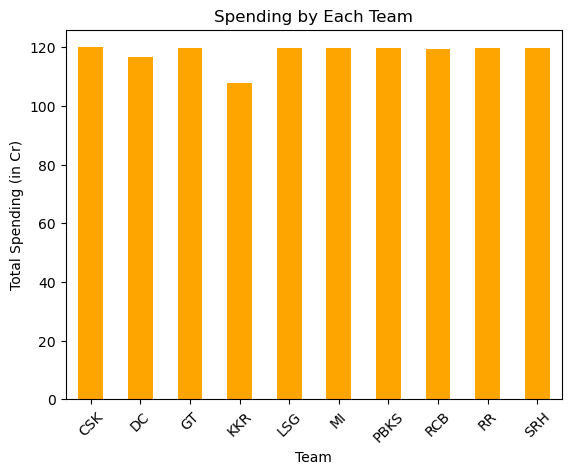

In [66]:
#spending of each team
spending_of_each_team = data.groupby('Team')['Sold'].sum()

spending_of_each_team.plot(kind='bar', color='orange')
plt.title('Spending by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Spending (in Cr)')
plt.xticks(rotation=45)
plt.show()

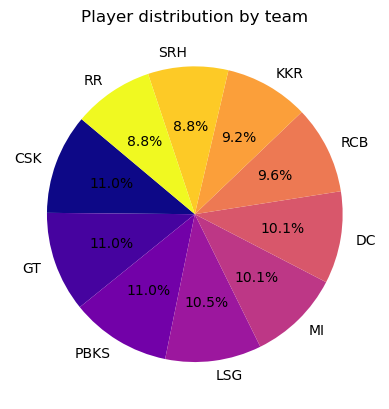

In [71]:
#distribution of players by team

data['Team'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='plasma')
plt.title('Player distribution by team')
plt.ylabel('')
plt.show()

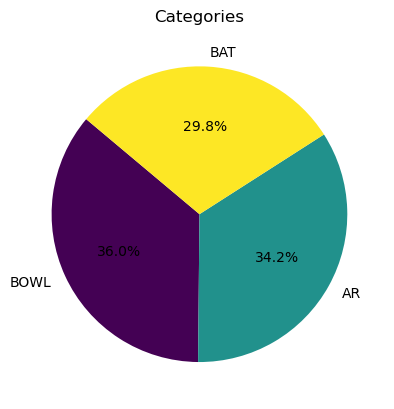

In [72]:
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Categories')
plt.ylabel('')
plt.show()

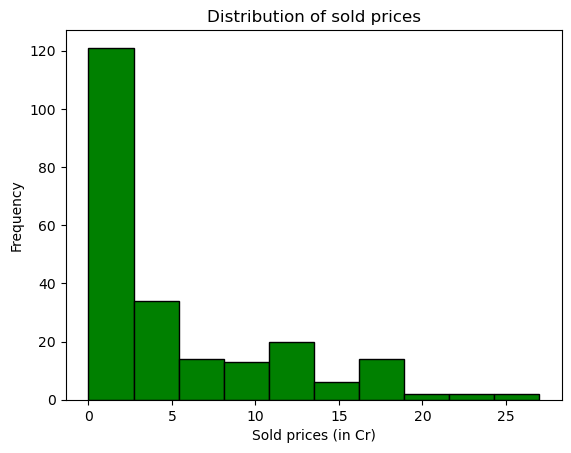

In [75]:
#histogram

plt.hist(data['Sold'], bins=10,color='green', edgecolor='black')
plt.title('Distribution of sold prices')
plt.xlabel('Sold prices (in Cr)')
plt.ylabel('Frequency')
plt.show()

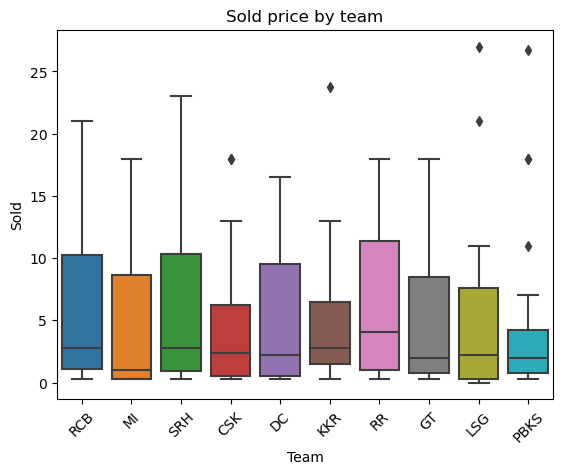

In [76]:
#boxplot

sns.boxplot(data=data,x='Team', y='Sold')
plt.title('Sold price by team')
plt.xticks(rotation=45)
plt.show()

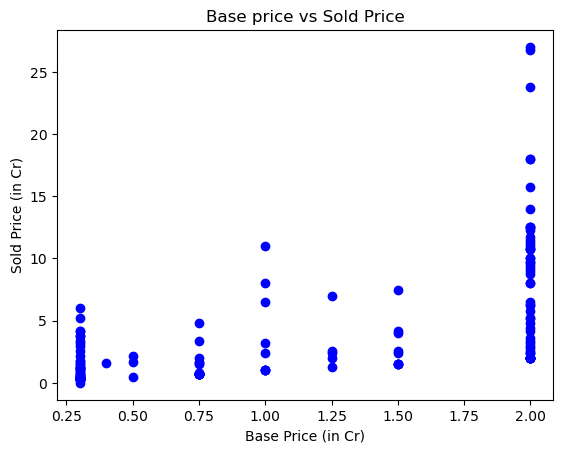

In [79]:
#scatterplot

data['Base'] = pd.to_numeric(data['Base'], errors='coerce')

plt.scatter(data['Base'], data['Sold'], color = 'blue')
plt.title('Base price vs Sold Price')
plt.xlabel('Base Price (in Cr)')
plt.ylabel('Sold Price (in Cr)')
plt.show()


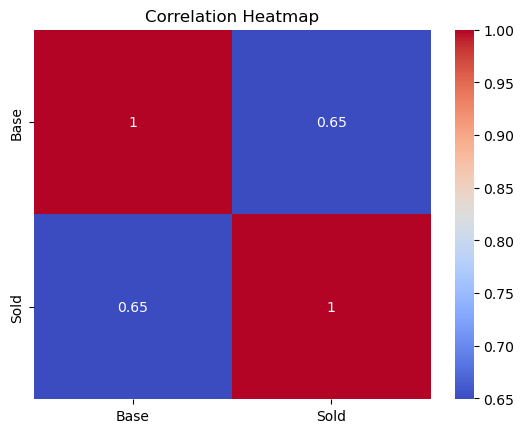

In [81]:
#heatmap

correlation = data[['Base','Sold']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

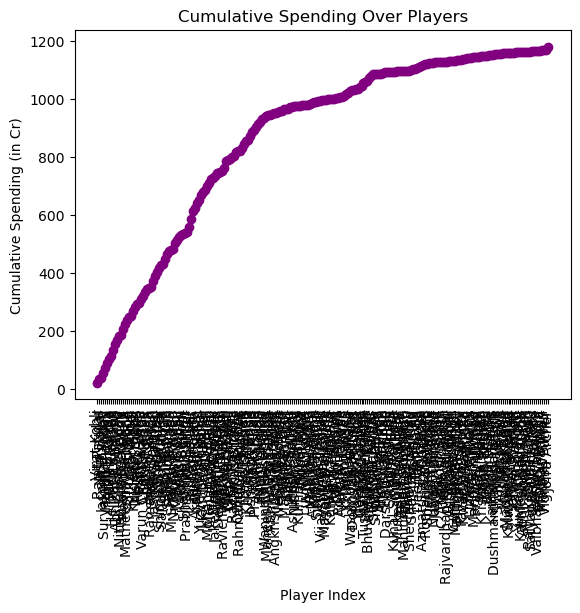

In [84]:
#cumulative sum of Sold price

data['Cumulative Spending'] = data['Sold'].cumsum()

#lineplot

plt.plot(data['Players'], data['Cumulative Spending'], marker = 'o', color = 'purple')
plt.title('Cumulative Spending Over Players')
plt.xlabel('Player Index')
plt.ylabel('Cumulative Spending (in Cr)')
plt.xticks(rotation=90)
plt.show()


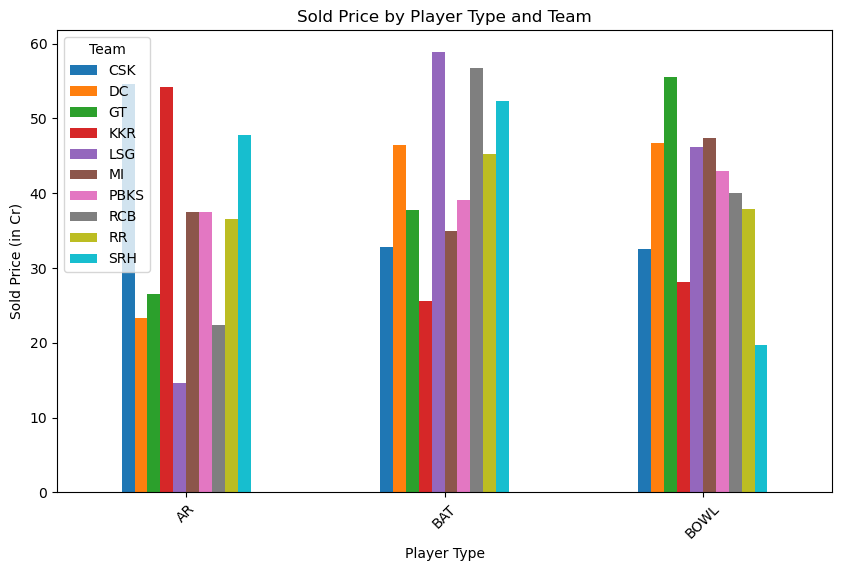

In [85]:
#grouped bar chart

grouped_data = data.groupby(['Type', 'Team'])['Sold'].sum().unstack()

grouped_data.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Sold Price by Player Type and Team')
plt.xlabel('Player Type')
plt.ylabel('Sold Price (in Cr)')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

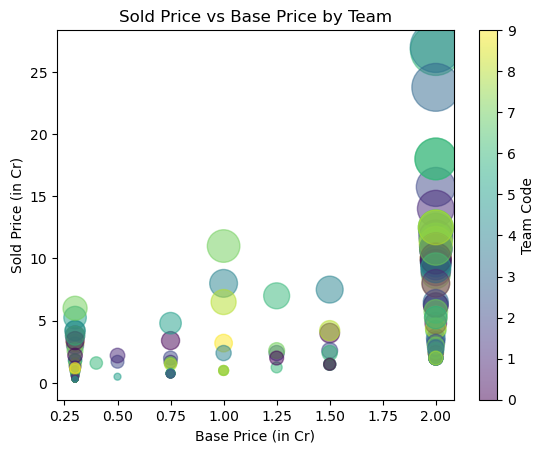

In [86]:
#bubble plot

plt.scatter(data['Base'], data['Sold'], s=data['Sold']*50, alpha=0.5, c=data['Team'].astype('category').cat.codes,cmap='viridis' )
plt.title('Sold Price vs Base Price by Team')
plt.xlabel('Base Price (in Cr)')
plt.ylabel('Sold Price (in Cr)')
plt.colorbar(label='Team Code')
plt.show()

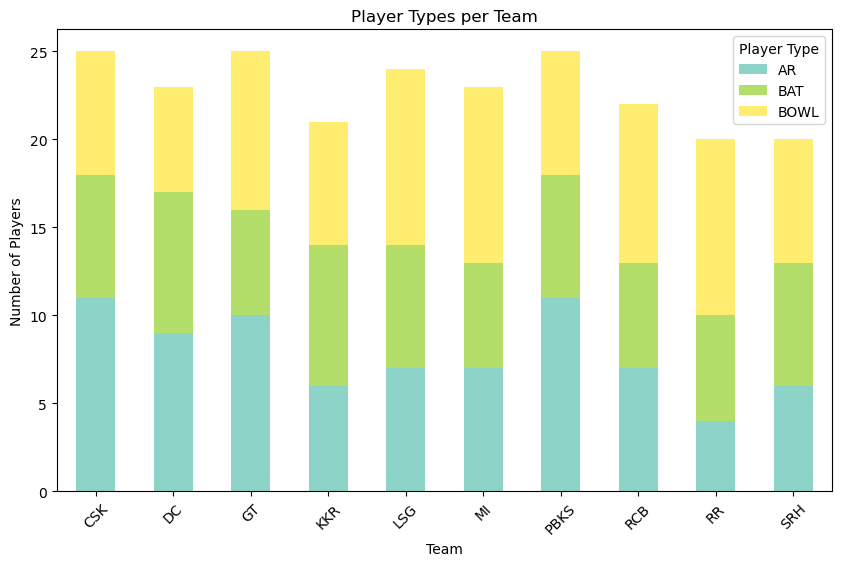

In [87]:
#stacked bar chart

stacked_data = data.groupby(['Team', 'Type']).size().unstack()

stacked_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Player Types per Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.legend(title='Player Type')
plt.xticks(rotation=45)
plt.show()

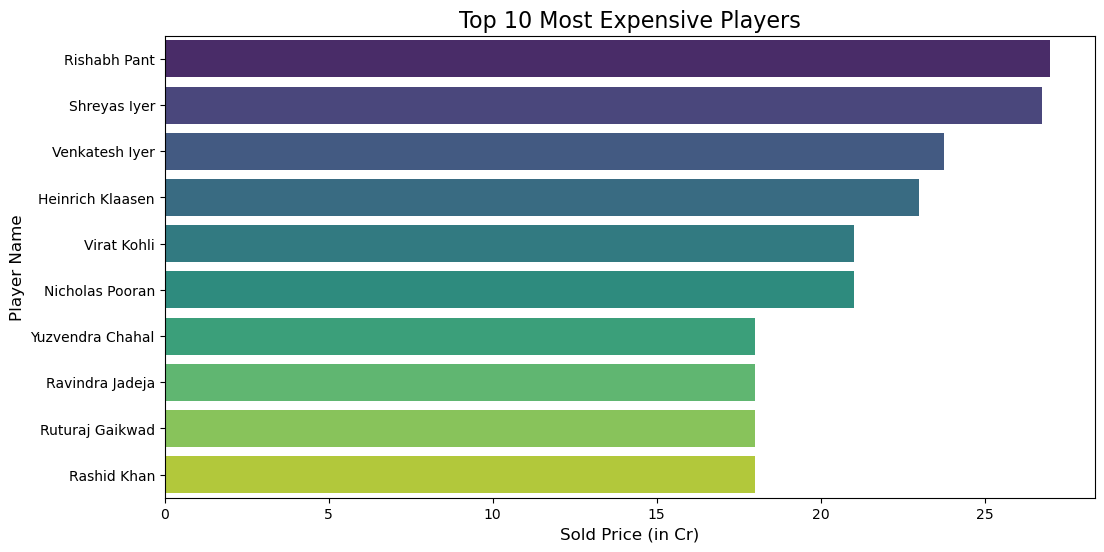

In [88]:
#most expensive 10 players


expensive_players = data[['Players', 'Sold']].sort_values(by='Sold', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Sold', y='Players', data=expensive_players, palette='viridis')
plt.title('Top 10 Most Expensive Players', fontsize=16)
plt.xlabel('Sold Price (in Cr)', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.show()